In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import pickle
import seaborn as sns

In [90]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',500)

## Set up dataframe

In [74]:
games_df = pd.DataFrame(games,columns = games[0].keys())

In [75]:
#saving df as json file
games_df.to_json('game_log_df.json')

In [288]:
df = pd.read_json('game_log_df.json')

df = df.sort_index()

In [289]:
df['gm_szn_type']=[type(i) for i in df.game_season]

In [290]:
df = df[df.gm_szn_type != type(None)].drop('gm_szn_type',axis=1)

In [291]:
# loop through each column and convert all numerical data from string to int/float
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [292]:
df.date_game = pd.to_datetime(df.date_game)

In [293]:
df['home'] = df.game_location.replace(['@',''],[0,1])

In [294]:
df = df[['player', 'game_season', 'date_game', 'age', 'home', 'team_id', 'game_location',
 'opp_id', 'game_result', 'gs', 'mp', 'fg', 'fga', 'fg_pct', 'fg3',
 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb', 'trb', 'ast',
 'stl', 'blk', 'tov', 'pf', 'pts', 'game_score', 'plus_minus']]

In [295]:
df = df.sort_values(by=['player', 'date_game'])

In [300]:
pd.get_dummies(df,columns=['opp_id'])

,player,game_season,date_game,age,home,team_id,game_location,game_result,gs,mp,fg,fga,fg_pct,fg3,fg3a,fg3_pct,ft,fta,ft_pct,orb,drb,trb,ast,stl,blk,tov,pf,pts,game_score,plus_minus,opp_id_ATL,opp_id_BOS,opp_id_BRK,opp_id_CHI,opp_id_CHO,opp_id_CLE,opp_id_DAL,opp_id_DEN,opp_id_DET,opp_id_GSW,opp_id_HOU,opp_id_IND,opp_id_LAC,opp_id_LAL,opp_id_MEM,opp_id_MIA,opp_id_MIL,opp_id_MIN,opp_id_NOP,opp_id_NYK,opp_id_OKC,opp_id_ORL,opp_id_PHI,opp_id_PHO,opp_id_POR,opp_id_SAC,opp_id_SAS,opp_id_TOR,opp_id_UTA,opp_id_WAS
0,abrinal01,1.0,2018-10-16,25-076,0,OKC,@,L (-8),0.0,23:28,3.0,8.0,0.375,2.0,6.0,0.333,0.0,0.0,NaN,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,8.0,3.4,-5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abrinal01,2.0,2018-10-19,25-079,0,OKC,@,L (-16),0.0,32:06,4.0,10.0,0.400,2.0,7.0,0.286,0.0,0.0,NaN,1.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,10.0,5.3,-9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abrinal01,3.0,2018-10-21,25-081,1,OKC,,L (-11),0.0,5:20,0.0,1.0,0.000,0.0,1.0,0.000,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,abrinal01,4.0,2018-10-25,25-085,1,OKC,,L (-6),0.0,18:33,2.0,5.0,0.400,2.0,5.0,0.400,0.0,1.0,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,6.0,3.1,6.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,abrinal01,5.0,2018-10-28,25-088,1,OKC,,W (+7),0.0,24:20,0.0,5.0,0.000,0.0,3.0,0.000,2.0,2.0,1.000,0.0,1.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,abrinal01,6.0,2018-10-30,25-090,1,OKC,,W (+18),0.0,15:10,1.0,2.0,0.500,1.0,1.0,1.000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,4.0,1.0,1.0,5.0,3.0,3.7,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,abrinal01,7.0,2018-11-01,25-092,0,OKC,@,W (+4),0.0,30:16,9.0,15.0,0.600,5.0,10.0,0.500,2.0,2.0,1.000,0.0,2.0,2.0,0.0,0.0,0.0,0.0,4.0,25.0,17.1,16.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,abrinal01,8.0,2018-11-02,25-093,0,OKC,@,W (+23),0.0,24:28,3.0,8.0,0.375,2.0,7.0,0.286,0.0,0.0,NaN,0.0,1.0,1.0,2.0,0.0,2.0,0.0,3.0,8.0,5.5,27.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,abrinal01,9.0,2018-11-05,25-096,1,OKC,,W (+6),0.0,30:16,2.0,4.0,0.500,1.0,2.0,0.500,2.0,2.0,1.000,0.0,4.0,4.0,3.0,0.0,0.0,1.0,1.0,7.0,6.9,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,abrinal01,10.0,2018-11-07,25-098,0,OKC,@,W (+9),0.0,26:13,3.0,12.0,0.250,3.0,10.0,0.300,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,2.4,11.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


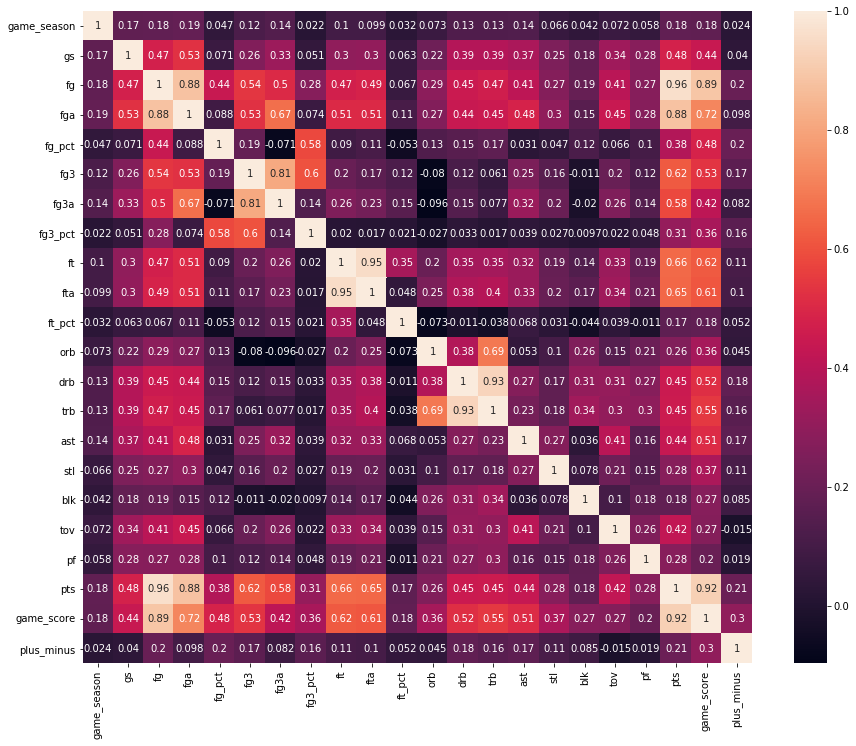

In [205]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

In [237]:
# back to back games ?

In [282]:
# source: https://help.yahoo.com/kb/fantasy-basketball/default-league-settings-fantasy-basketball-sln6919.html
yahoo_scoring = dict(pts = 1,
                     reb = 1.2,
                     asst = 1.5,
                     blk = 3,
                     stl = 3,
                     turnover = -1)

In [278]:
(22)+(3*1.2)+(9*1.5)+(0)+(3*3)-(5)

43.1

In [301]:
set(df.player)

{'abrinal01',
 'acyqu01',
 'adamsja01',
 'adamsst01',
 'adebaba01',
 'adelde01',
 'akoonde01',
 'aldrila01',
 'alkinra01',
 'allengr01',
 'allenja01',
 'allenka01',
 'aminual01',
 'anderju01',
 'anderky01',
 'anderry01',
 'anigbik01',
 'antetgi01',
 'antetko01',
 'anthoca01',
 'anunoog01',
 'arcidry01',
 'arizatr01',
 'asikom01',
 'augusdj01',
 'aytonde01',
 'bacondw01',
 'baglema01',
 'bakerro01',
 'baldwwa01',
 'balllo01',
 'bambamo01',
 'bareajo01',
 'barneha02',
 'bartowi01',
 'bateske01',
 'batumni01',
 'bayleje01',
 'baynear01',
 'bazemke01',
 'bealbr01',
 'beaslma01',
 'beaslmi01',
 'belinma01',
 'belljo01',
 'bembrde01',
 'bendedr01',
 'bertada01',
 'bertada02',
 'beverpa01',
 'birchkh01',
 'birdja01',
 'biyombi01',
 'bjeline01',
 'blakean01',
 'bledser01',
 'blossja01',
 'bogdabo01',
 'bogdabo02',
 'bogutan01',
 'boldejo01',
 'bongais01',
 'bookede01',
 'bouchch01',
 'bradlav01',
 'bradlto01',
 'breweco01',
 'bridgmi01',
 'bridgmi02',
 'briscis01',
 'broekry01',
 'brogdma01',
